In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
import warnings
warnings.filterwarnings("ignore")

In [15]:
df = pd.read_csv("lung_cancer_dataset.csv")
df.sample(1)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
811,M,51,2,2,1,2,2,2,2,1,1,2,2,1,2,YES


In [16]:
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC_DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING',
       'ALCOHOL_CONSUMING', 'COUGHING', 'SHORTNESS_OF_BREATH',
       'SWALLOWING_DIFFICULTY', 'CHEST_PAIN', 'LUNG_CANCER'],
      dtype='object')

In [17]:
df.shape

(3000, 16)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 3000 non-null   object
 1   AGE                    3000 non-null   int64 
 2   SMOKING                3000 non-null   int64 
 3   YELLOW_FINGERS         3000 non-null   int64 
 4   ANXIETY                3000 non-null   int64 
 5   PEER_PRESSURE          3000 non-null   int64 
 6   CHRONIC_DISEASE        3000 non-null   int64 
 7   FATIGUE                3000 non-null   int64 
 8   ALLERGY                3000 non-null   int64 
 9   WHEEZING               3000 non-null   int64 
 10  ALCOHOL_CONSUMING      3000 non-null   int64 
 11  COUGHING               3000 non-null   int64 
 12  SHORTNESS_OF_BREATH    3000 non-null   int64 
 13  SWALLOWING_DIFFICULTY  3000 non-null   int64 
 14  CHEST_PAIN             3000 non-null   int64 
 15  LUNG_CANCER          

In [19]:
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC_DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL_CONSUMING        0
COUGHING                 0
SHORTNESS_OF_BREATH      0
SWALLOWING_DIFFICULTY    0
CHEST_PAIN               0
LUNG_CANCER              0
dtype: int64

In [7]:
# Insight >> there are no NULL values in the data 

In [20]:
df.duplicated().sum()

np.int64(2)

In [ ]:
# Insight >> there are 2 duplicates row in the dataset. 

In [21]:
# Drop the duplicates
df = df.drop_duplicates()

In [22]:
df.reset_index(drop=True , inplace= True)

In [23]:
# now there are 2998 rows and 16 columns in the dataset
df.shape

(2998, 16)

In [24]:
df.head(3)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,65,1,1,1,2,2,1,2,2,2,2,2,2,1,NO
1,F,55,1,2,2,1,1,2,2,2,1,1,1,2,2,NO
2,F,78,2,2,1,1,1,2,1,2,1,1,2,1,1,YES


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 2998 non-null   object
 1   AGE                    2998 non-null   int64 
 2   SMOKING                2998 non-null   int64 
 3   YELLOW_FINGERS         2998 non-null   int64 
 4   ANXIETY                2998 non-null   int64 
 5   PEER_PRESSURE          2998 non-null   int64 
 6   CHRONIC_DISEASE        2998 non-null   int64 
 7   FATIGUE                2998 non-null   int64 
 8   ALLERGY                2998 non-null   int64 
 9   WHEEZING               2998 non-null   int64 
 10  ALCOHOL_CONSUMING      2998 non-null   int64 
 11  COUGHING               2998 non-null   int64 
 12  SHORTNESS_OF_BREATH    2998 non-null   int64 
 13  SWALLOWING_DIFFICULTY  2998 non-null   int64 
 14  CHEST_PAIN             2998 non-null   int64 
 15  LUNG_CANCER          

In [26]:
df['AGE'].describe()

count    2998.000000
mean       55.171448
std        14.728302
min        30.000000
25%        42.000000
50%        55.000000
75%        68.000000
max        80.000000
Name: AGE, dtype: float64

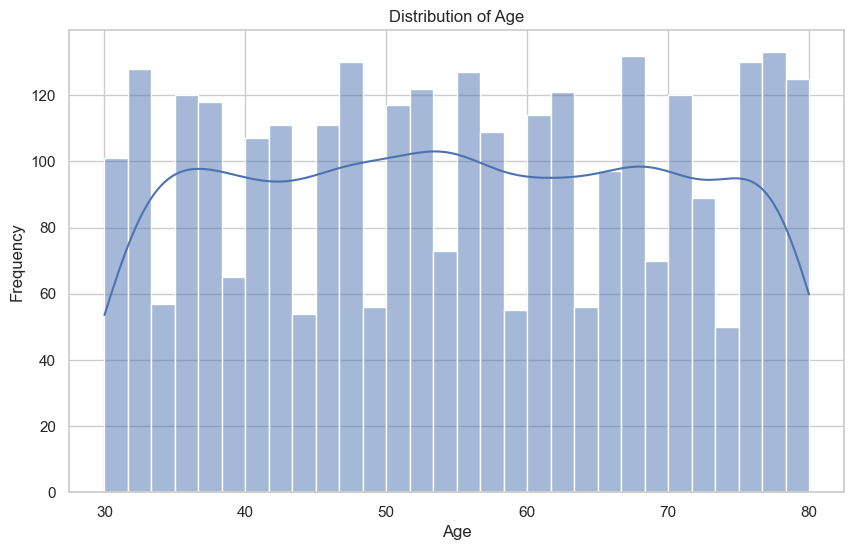

In [27]:
# Distribution of Age
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(df['AGE'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

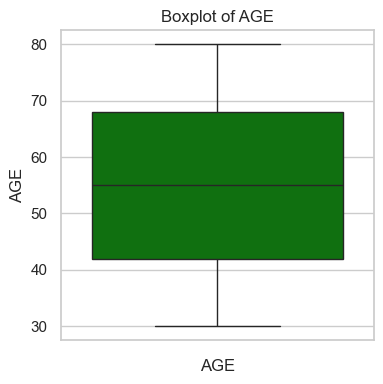

In [28]:
numeric_cols = ['AGE']
plt.figure(figsize=(4, 4))
for i, column in enumerate(numeric_cols, 1):
    plt.subplot(1, len(numeric_cols), i)
    sns.boxplot(y=df[column], color='green')
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
plt.tight_layout()
plt.show()

In [ ]:
# INSIGHT >> Minimun age is 30 , maximum age is 80 ,
# average age is 55 , median is 55 >> The mean and median are quite close, suggesting a fairly symmetrical distribution around the central value.
# The std dev is relatively large compared to the mean, indicating a wide range of ages in the dataset.
# IQR = Q3 - Q1 = 26 years, indicating that the middle 50% of the data falls within this range.

In [29]:
gender_percentage = df['GENDER'].value_counts(normalize=True)*100

In [30]:
gender_percentage

GENDER
M    50.433622
F    49.566378
Name: proportion, dtype: float64

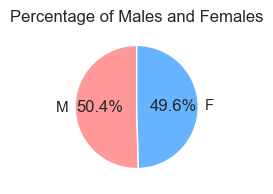

In [31]:
plt.figure(figsize=(2,2))
plt.pie(gender_percentage , labels=gender_percentage.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'] )
plt.title('Percentage of Males and Females')
plt.show()

In [ ]:
# INSIGHT >> Males are 50% and females are 49% which are almost equal in ratio

In [32]:
lung_cancer_case = df['LUNG_CANCER'].value_counts(normalize=True)*100

In [33]:
lung_cancer_case

LUNG_CANCER
YES    50.6004
NO     49.3996
Name: proportion, dtype: float64

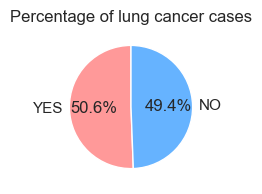

In [34]:
plt.figure(figsize=(2,2))
plt.pie(lung_cancer_case , labels=lung_cancer_case.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'] )
plt.title('Percentage of lung cancer cases')
plt.show()

In [ ]:
# INSIGHT >> The percentages are almost equal, with 50.6% of the cases being 'YES' and 49.4% being 'NO'

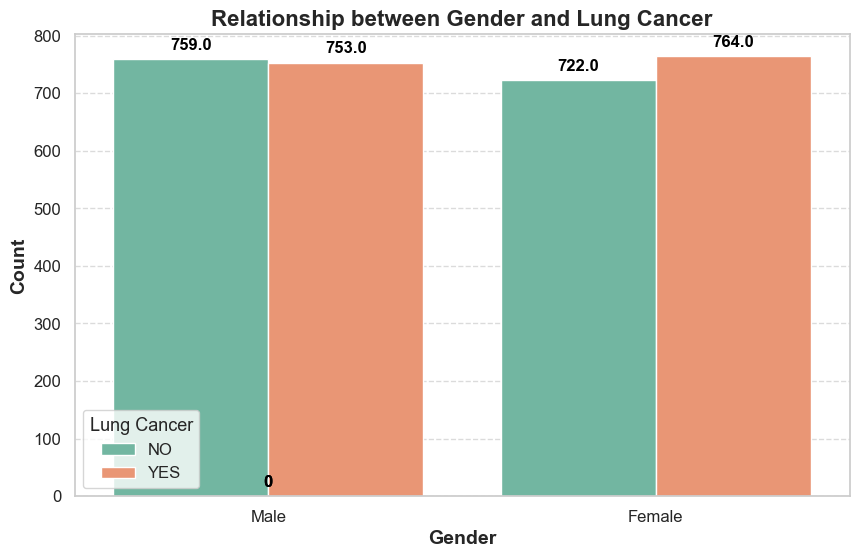

In [35]:
# Relationship between LUNG_CANCER and GENDER
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='GENDER', hue='LUNG_CANCER', palette='Set2')
plt.title('Relationship between Gender and Lung Cancer', fontsize=16, fontweight='bold')
plt.xlabel('Gender', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.legend(title='Lung Cancer', title_fontsize='13', fontsize='12')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'], rotation=0, fontsize=12)
plt.yticks(fontsize=12)

# Annotate each bar with the count value
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', fontsize=12, color='black', xytext=(0, 10), 
                       textcoords='offset points', fontweight='bold')

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


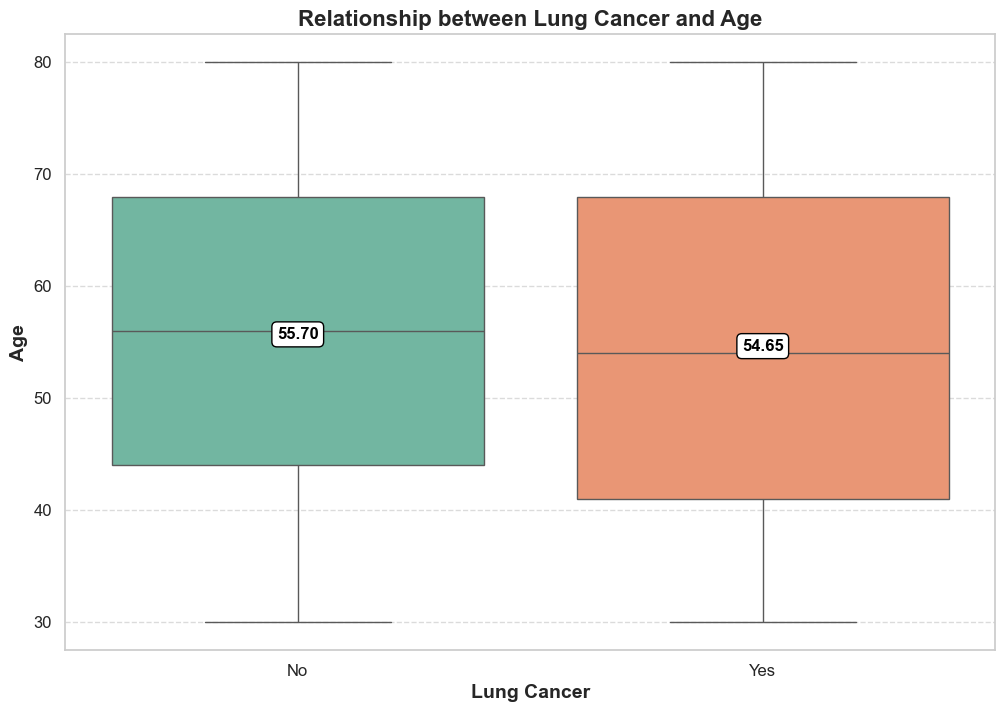

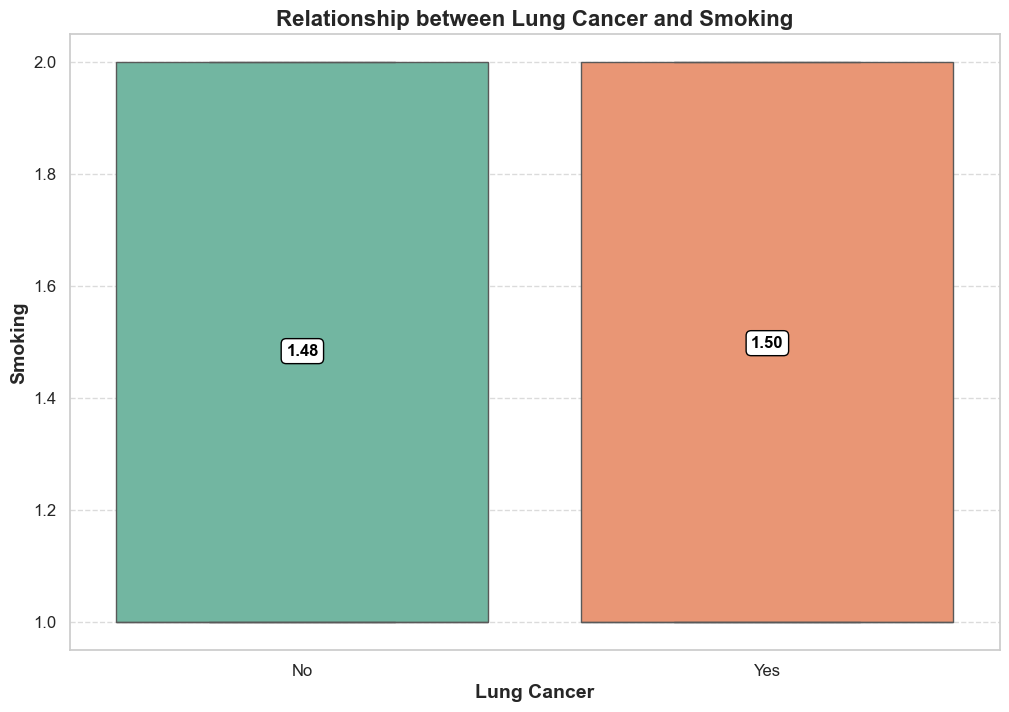

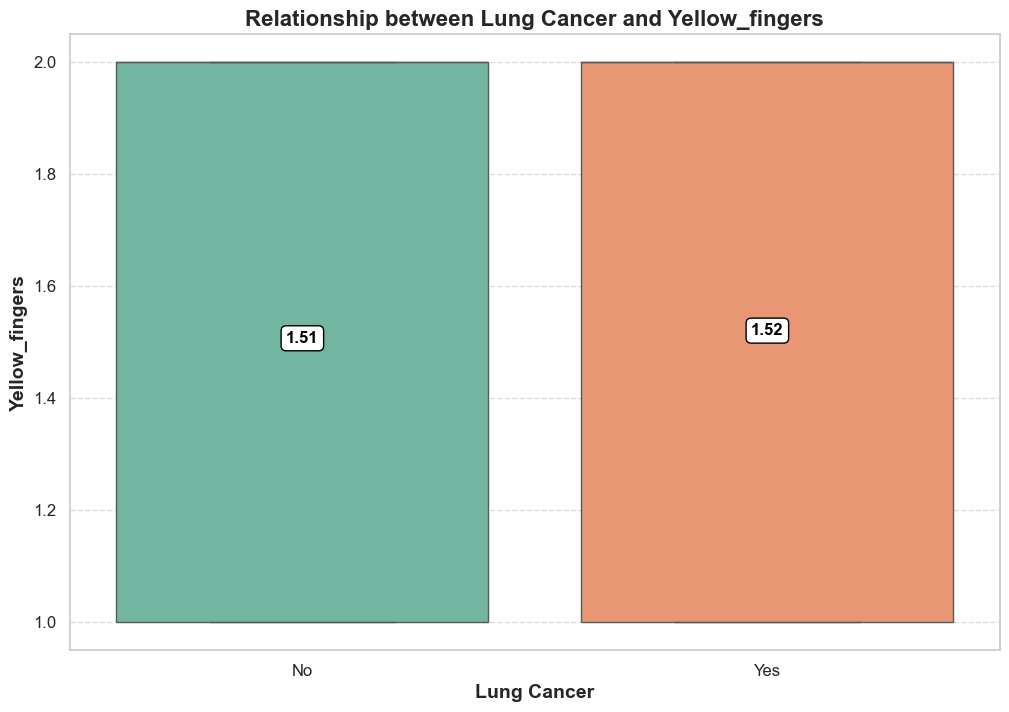

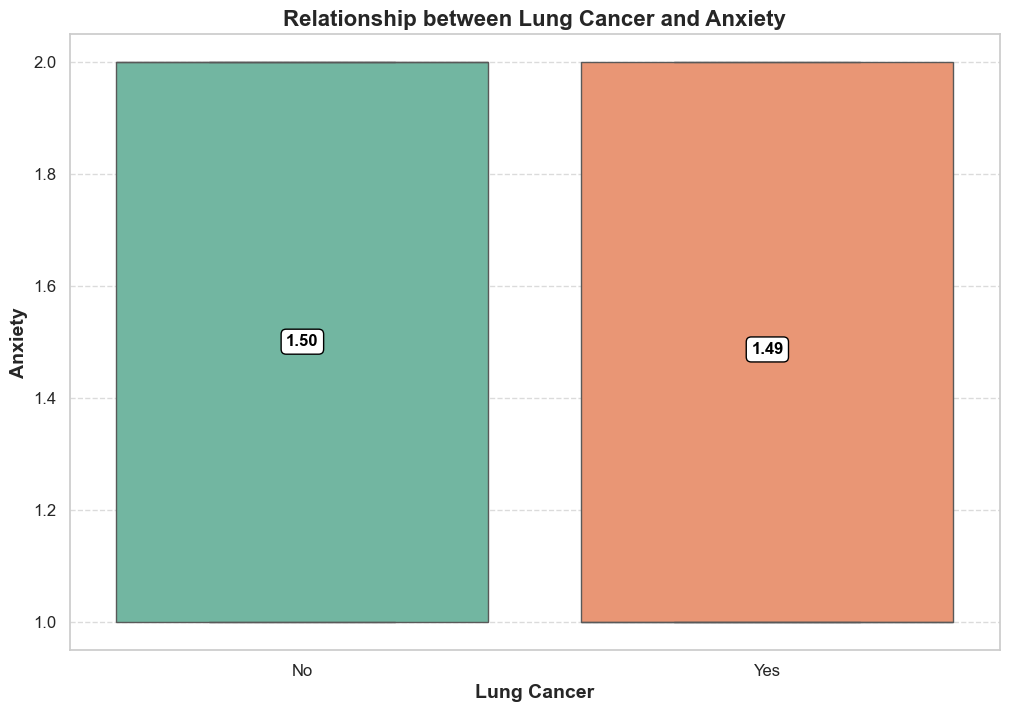

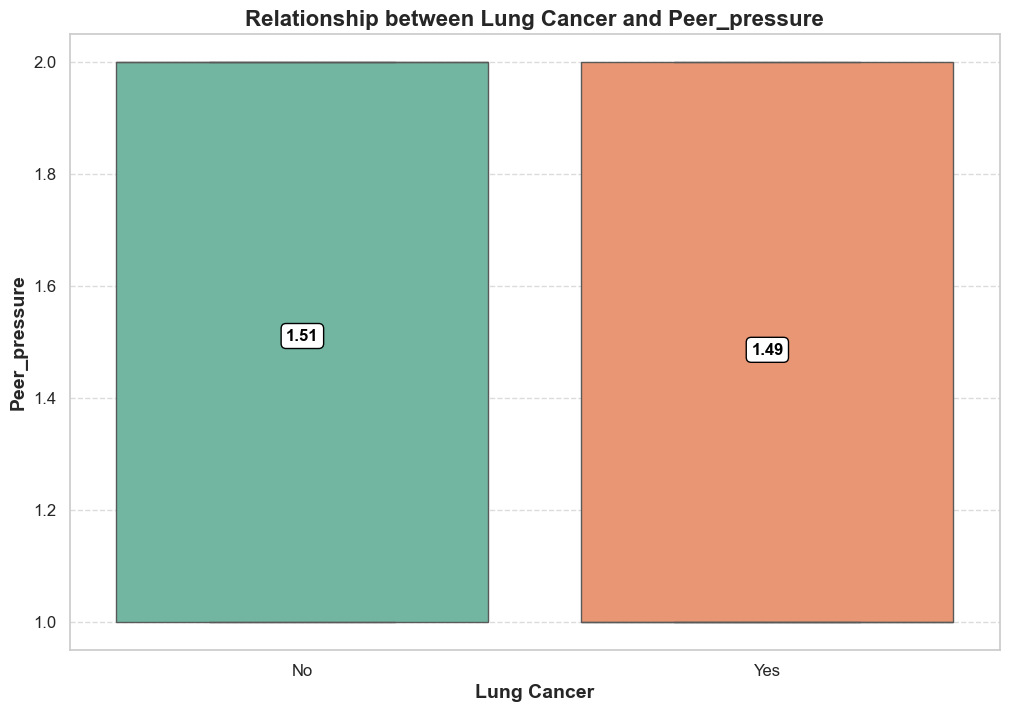

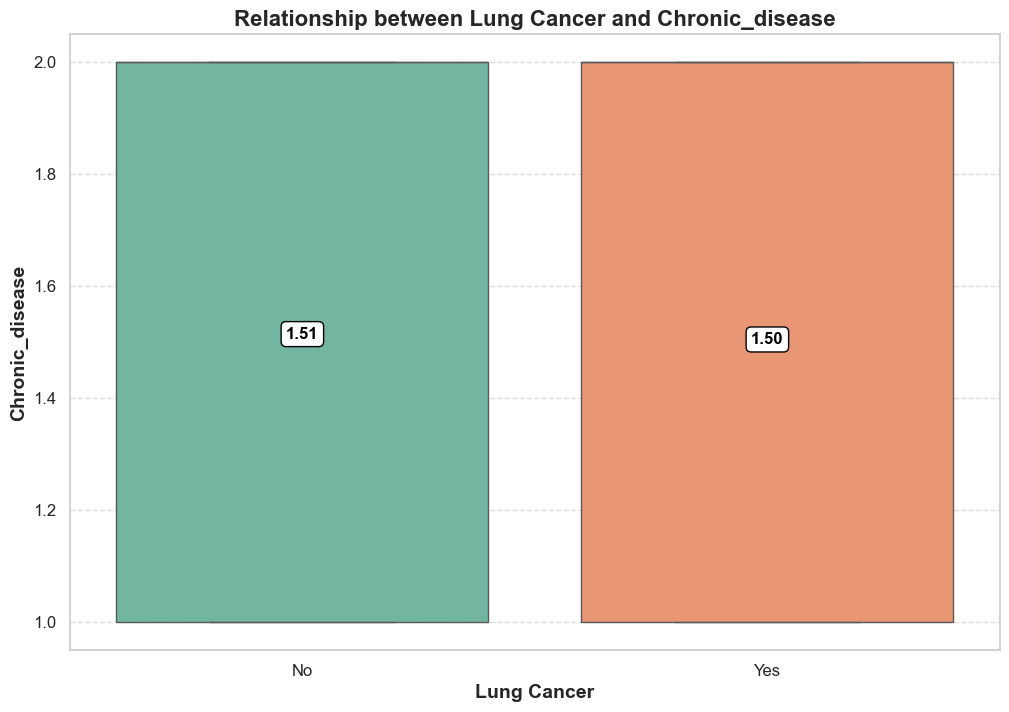

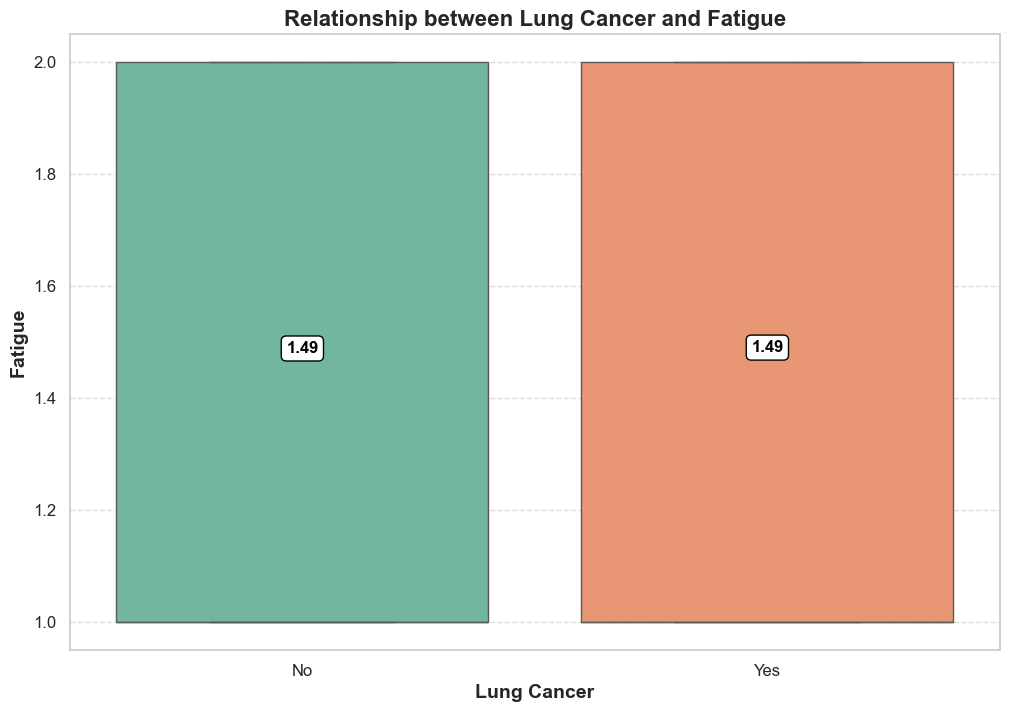

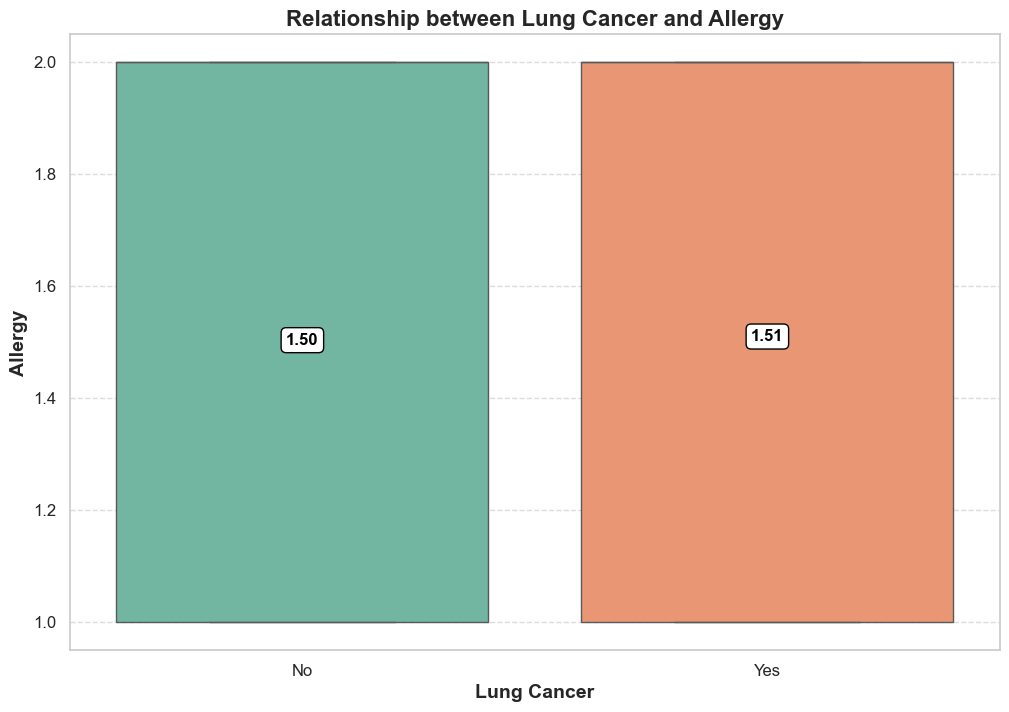

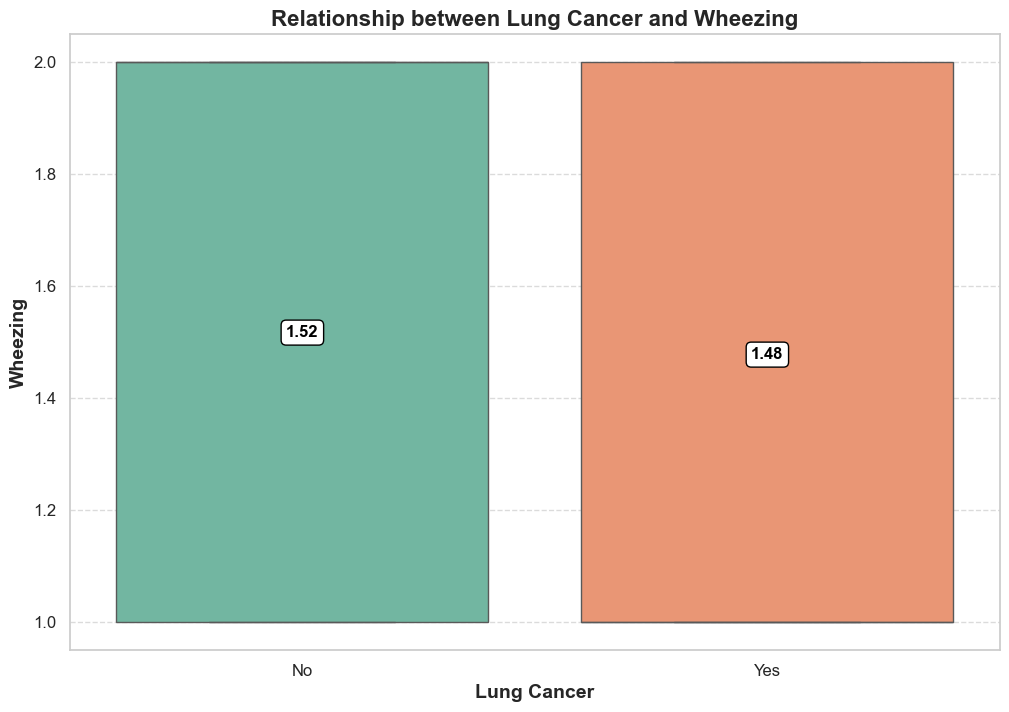

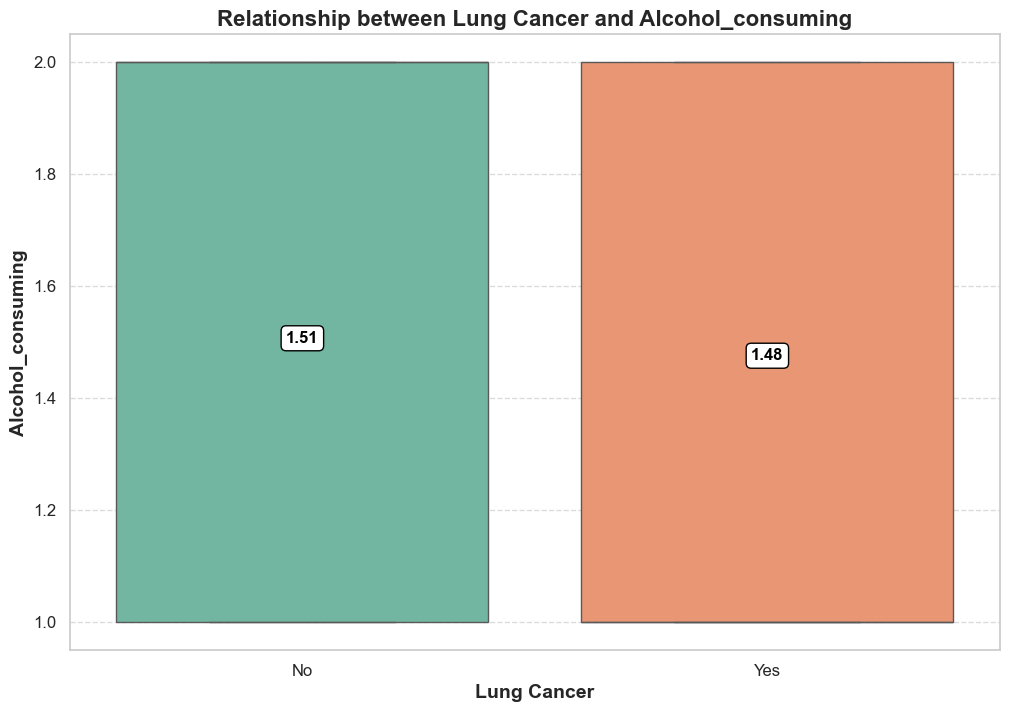

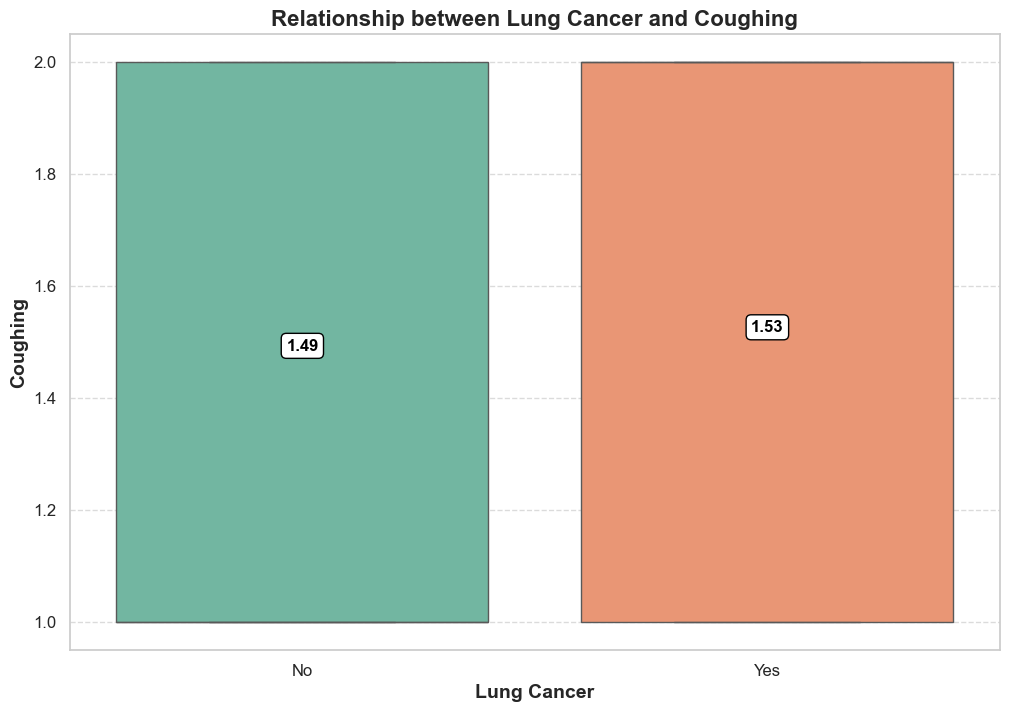

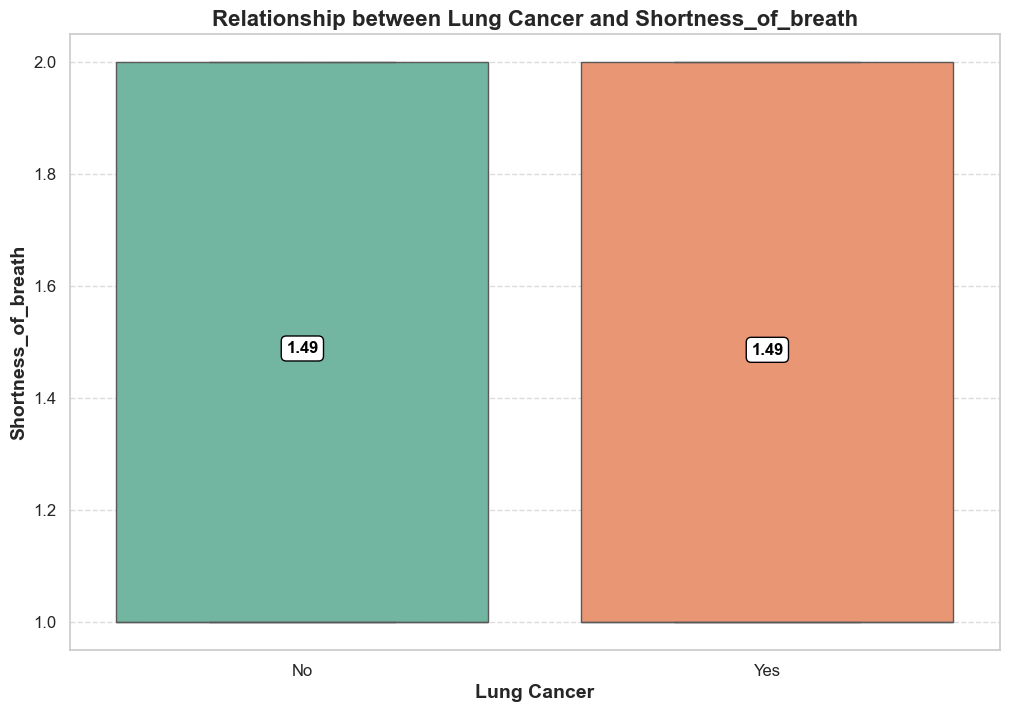

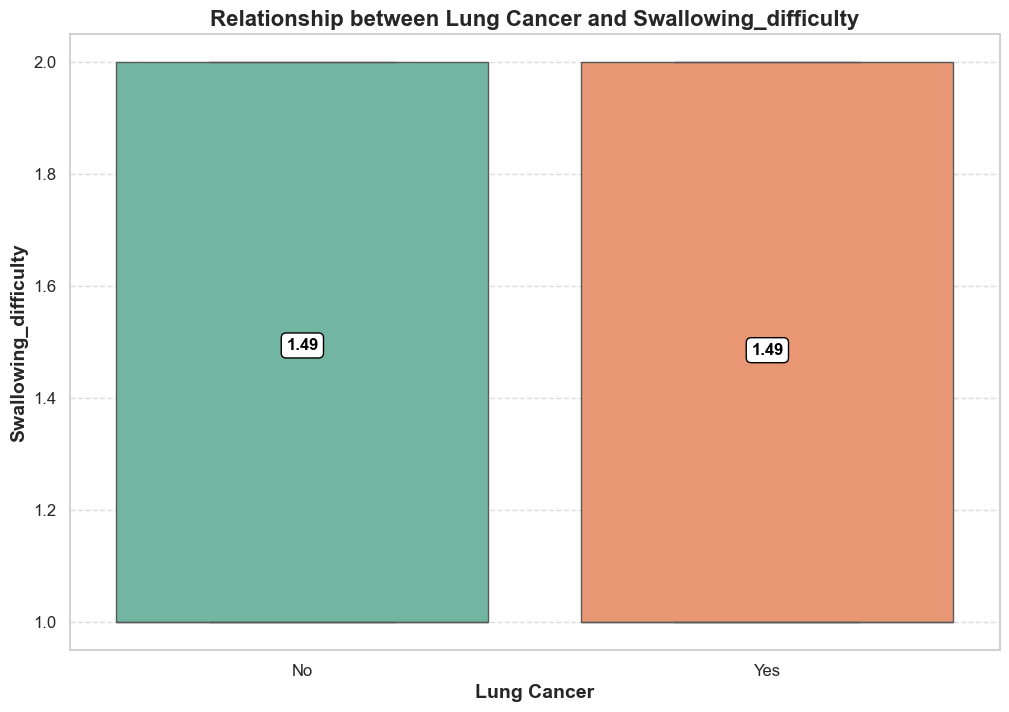

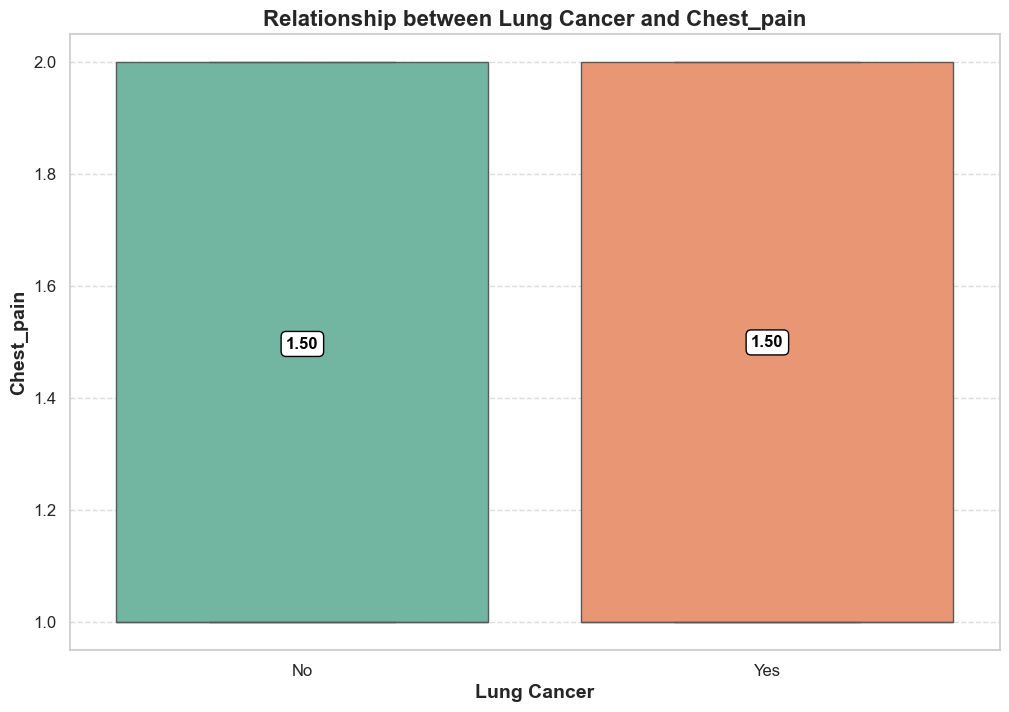

In [38]:
# Relationship between target variable and numerical features
for col in ['AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC_DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING', 'ALCOHOL_CONSUMING', 'COUGHING', 'SHORTNESS_OF_BREATH', 'SWALLOWING_DIFFICULTY', 'CHEST_PAIN']:
    plt.figure(figsize=(12, 8))
    
    # Box plot with color
    sns.boxplot(data=df, x='LUNG_CANCER', y=col, palette='Set2')
    
    # Overlay mean values
    means = df.groupby('LUNG_CANCER')[col].mean().values
    for i, mean in enumerate(means):
        plt.text(i, mean, f'{mean:.2f}', ha='center', va='center', color='black', fontsize=12, fontweight='bold', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))
    
    # Add a detailed title and axis labels
    plt.title(f'Relationship between Lung Cancer and {col.capitalize()}', fontsize=16, fontweight='bold')
    plt.xlabel('Lung Cancer', fontsize=14, fontweight='bold')
    plt.ylabel(col.capitalize(), fontsize=14, fontweight='bold')
    
    # Customize ticks
    plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0, fontsize=12)
    plt.yticks(fontsize=12)
    
    # Add grid for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    plt.show()


In [ ]:
# TARGET VARIABLE IS LUNG_CANCER which is categorical
# converting the target variable into numerical 

In [39]:
df['LUNG_CANCER'] = df['LUNG_CANCER'].map({'YES' :1  , 'NO' : 0})

In [40]:
df['GENDER'] = df['GENDER'].map({'M' : 0 , 'F' : 1})

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 2998 non-null   int64
 1   AGE                    2998 non-null   int64
 2   SMOKING                2998 non-null   int64
 3   YELLOW_FINGERS         2998 non-null   int64
 4   ANXIETY                2998 non-null   int64
 5   PEER_PRESSURE          2998 non-null   int64
 6   CHRONIC_DISEASE        2998 non-null   int64
 7   FATIGUE                2998 non-null   int64
 8   ALLERGY                2998 non-null   int64
 9   WHEEZING               2998 non-null   int64
 10  ALCOHOL_CONSUMING      2998 non-null   int64
 11  COUGHING               2998 non-null   int64
 12  SHORTNESS_OF_BREATH    2998 non-null   int64
 13  SWALLOWING_DIFFICULTY  2998 non-null   int64
 14  CHEST_PAIN             2998 non-null   int64
 15  LUNG_CANCER            2998 non-null  

In [42]:
df.describe()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
count,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000
mean,0.495664,55.171448,1.491328,1.514009,1.493996,1.498666,1.509673,1.489660,1.507005,1.497332,1.491328,1.510340,1.487658,1.489993,1.498332,0.506004
std,0.500065,14.728302,0.500008,0.499887,0.500047,0.500082,0.499990,0.499976,0.500034,0.500076,0.500008,0.499976,0.499931,0.499983,0.500081,0.500047
min,0.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,42.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
50%,0.000000,55.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,68.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
max,1.000000,80.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000


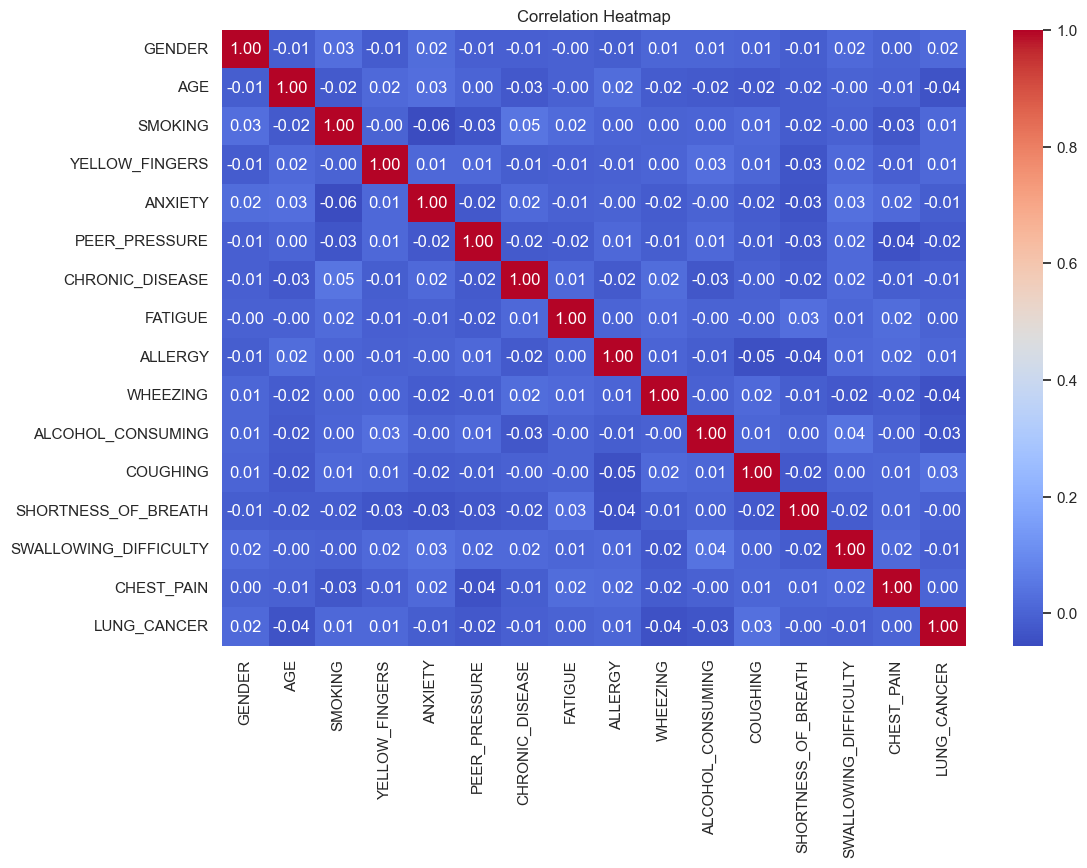

In [43]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


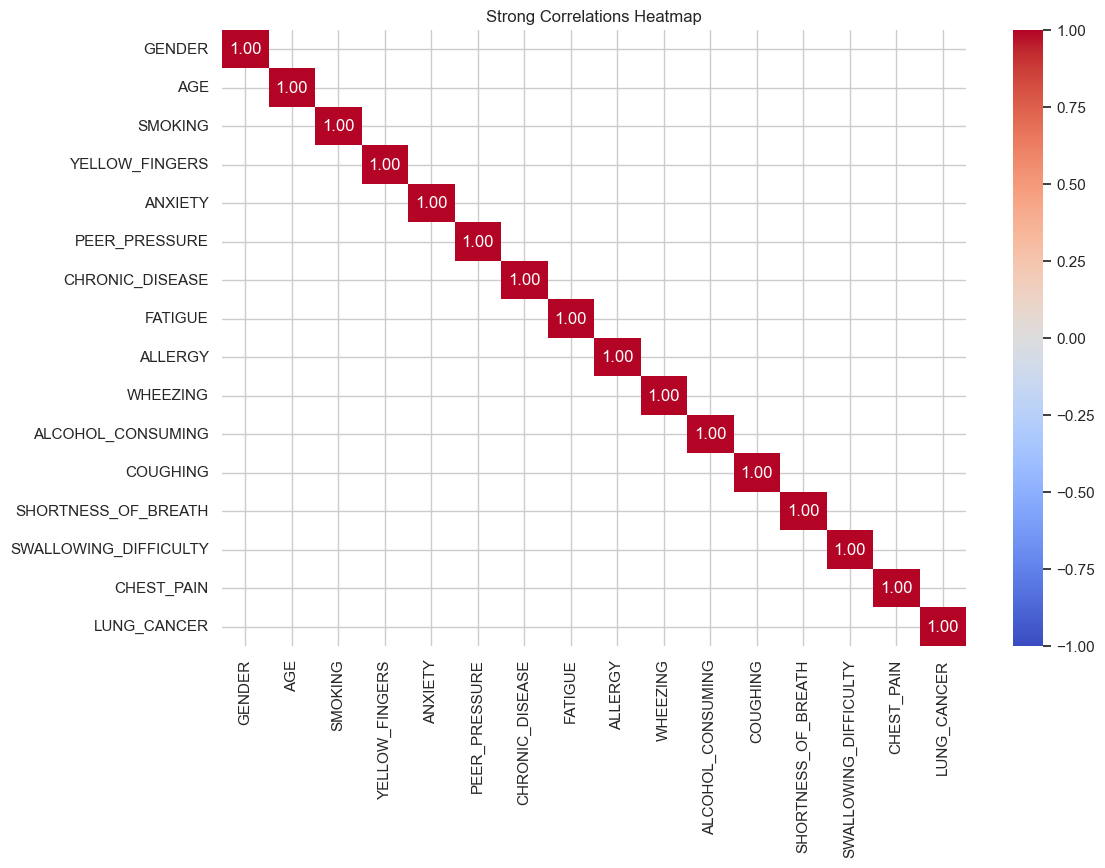

In [47]:
# Strong correlations only
threshold = 0.5
strong_corr_matrix = df.corr()[(df.corr() >= threshold) | (df.corr() <= -threshold)]
plt.figure(figsize=(12, 8))
sns.heatmap(strong_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Strong Correlations Heatmap')
plt.show()

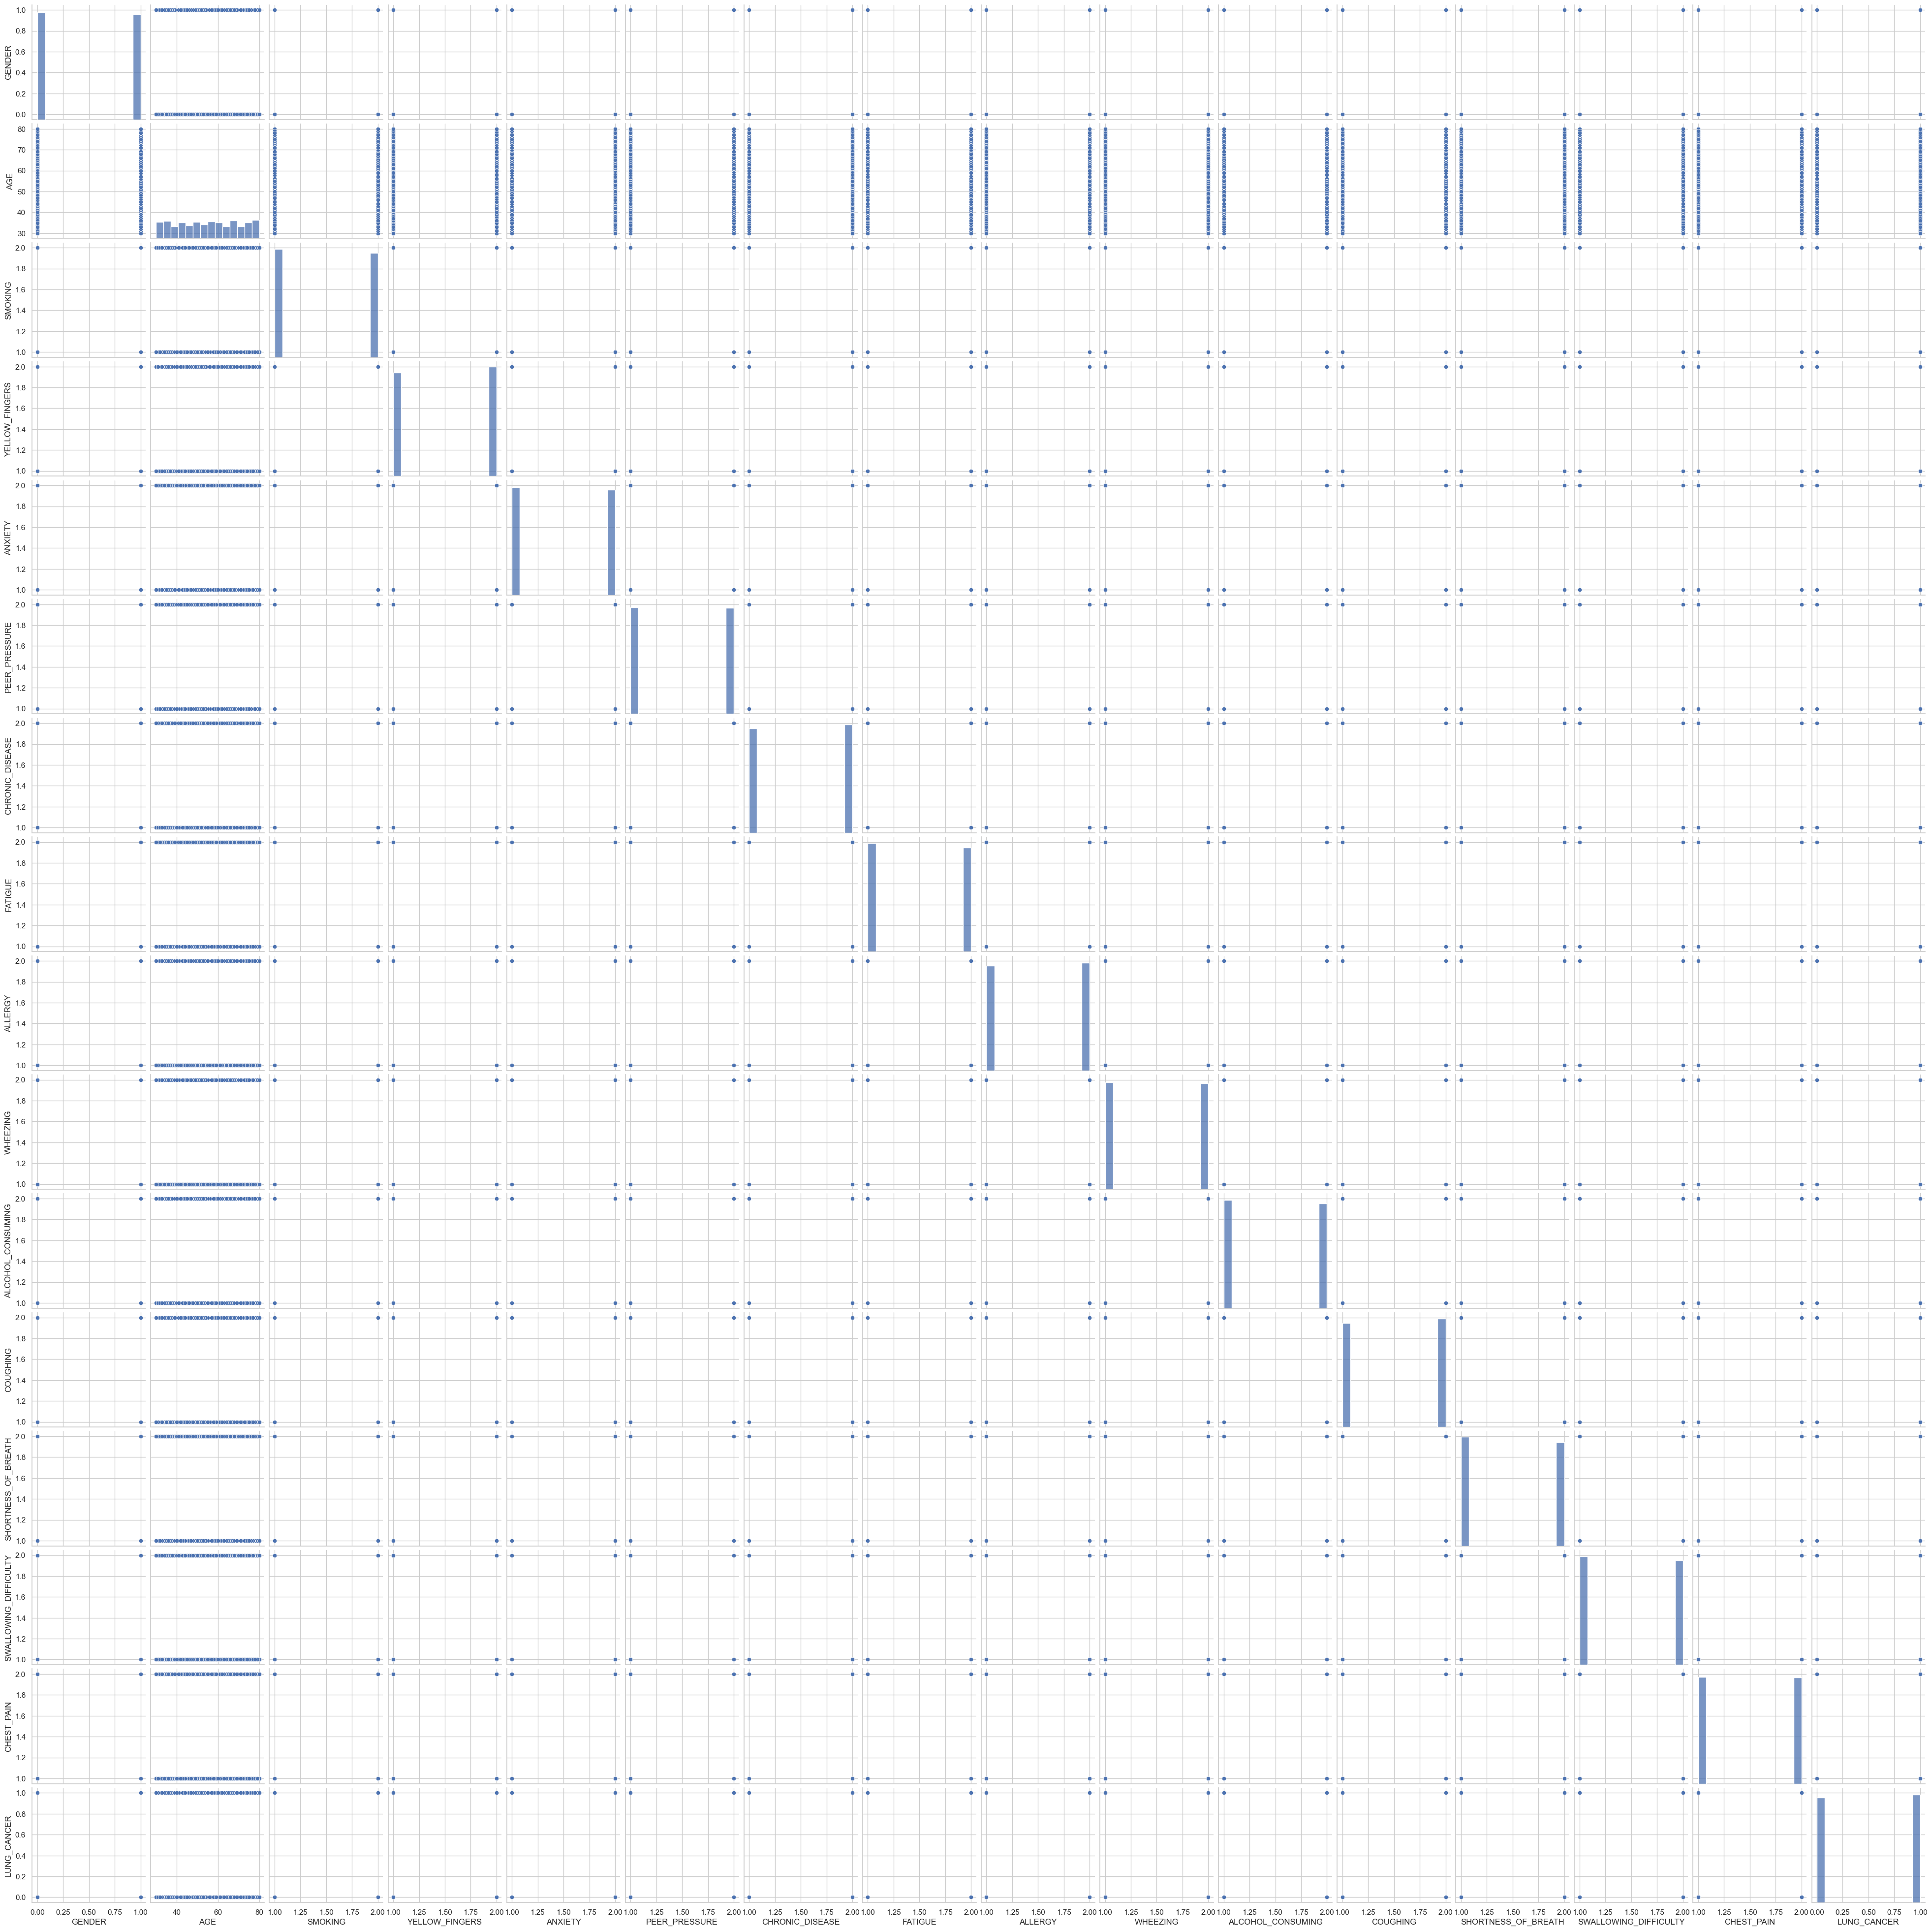

In [48]:
# Pair plot for numerical features
sns.pairplot(df)
plt.show()

In [49]:
# data splitting
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target (y)
X = df.drop('LUNG_CANCER', axis=1)
y = df['LUNG_CANCER']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [50]:
# Model building

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')


[[148 152]
 [141 159]]
              precision    recall  f1-score   support

           0       0.51      0.49      0.50       300
           1       0.51      0.53      0.52       300

    accuracy                           0.51       600
   macro avg       0.51      0.51      0.51       600
weighted avg       0.51      0.51      0.51       600

Accuracy: 0.51
